
 <!-- ls *.ipynb | entr -r jupyter nbconvert 16_intro_to_python_2.ipynb --to slides --post serve --template reveal --SlidesExporter.reveal_number='c/t' --SlidesExporter.reveal_scroll=True -->

# Python for Data Science 

## Python for Data Science

---

- **pandas**: A fundamental library for data manipulation in Python.
    - Think of pandas as a powerful version of Excel within Python.
    - Great for handling structured data like tables and time series.
    - Reading data from various formats (CSV, Excel, SQL) is a breeze.
    - Cheet sheet provided @ [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


## Getting started with pandas

Reading data into pandas is as simple as calling a `read_*` function on a file or URL.

- **Flat Files**: `read_csv()`, `read_table()`
- **Excel Files**: `read_excel()`
- **Binary Files**: `read_hdf()`, `read_parquet()`, `read_pickle()`
- **SQL Databases**: `read_sql()`, `read_sql_table()`
- **Other Formats**: `read_json()`, `read_html()`, `read_stata()`, `read_sas()`


In [1]:
import pandas as pd

# Load the datasets
netflix_df = pd.read_csv(
    "https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/netflix_titles.csv"
)
hulu_df = pd.read_csv(
    "https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/hulu_titles.csv"
)
disney_plus_df = pd.read_csv(
    "https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/disney_plus_titles.csv"
)
amazon_prime_df = pd.read_csv(
    "https://raw.githubusercontent.com/EEB330/slides/main/16_intro_to_python_2/amazon_prime_titles.csv"
)

print(netflix_df.head(3))

  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                

## Python for Data Science

---

- **Matplotlib**: The go-to library for making graphs in Python.
    - It's akin to the base plotting in `R`. Fully functional but the defaults aren't pretty!
    - _Many_ cheet sheets at: [https://matplotlib.org/cheatsheets/](https://matplotlib.org/cheatsheets/)
- **Seaborn**: Builds on Matplotlib by making complex plots more accessible.
    - Think of Seaborn as the stylist that makes your graphs look good.
    - Integrated directly with pandas data structures (data frames!)
    - Cheet sheet @ [DataCamp](https://images.datacamp.com/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf)


- With pandas + Matplotlib and Seaborn, we can quickly inspect, manipulate, and plot data.


## Exploratory data analysis by example

### Creating a DataFrame

In [2]:
from IPython.display import display, HTML

# Dictionary!
data = {
    "Product": ["Apples", "Bananas", "Cherries"],
    "Price": [1.20, 0.80, 2.50],
    "Quantity": [10, 5, 7],
}

# Create DataFrame
df = pd.DataFrame(data)
display(HTML(df.to_html()))

,Product,Price,Quantity
0,Apples,1.2,10
1,Bananas,0.8,5
2,Cherries,2.5,7


## Data Selection & Filtering in Pandas

Essentials for pandas DataFrame operations:

- **Columns:** `df['col']` or `df[['col1', 'col2']]`
- **Rows by Position:** `df.iloc[0]` or `df.iloc[:5]`
- **Rows by Label:** `df.loc['index']`
- **Condition:** `df[df['col'] > value]`
- **Combine Rows & Columns:** `df.loc[rows, ['col1', 'col2']]`
- **Scalar Value:** `df.at['row', 'col']` or `df.iat[0, 1]`
- **Query:** `df.query('expression')`

In [3]:
# Single column
prices = df["Price"]
print(f"Type: {type(prices)}, Values: {prices}")

Type: <class 'pandas.core.series.Series'>, Values: 0    1.2
1    0.8
2    2.5
Name: Price, dtype: float64


In [4]:
# Multiple columns
selection = df[["Product", "Price"]]
print(f"Type: {type(selection)}, Values: {selection}")
display(HTML(selection.to_html()))

Type: <class 'pandas.core.frame.DataFrame'>, Values:     Product  Price
0    Apples    1.2
1   Bananas    0.8
2  Cherries    2.5


,Product,Price
0,Apples,1.2
1,Bananas,0.8
2,Cherries,2.5


In [5]:
# Single row -- iloc is index locate
first_row = df.iloc[0]
print(f"First first rows: {first_row}")

# Multiple rows
first_two_rows = df.iloc[0:2]
print(f"First two rows: {first_two_rows}")

First first rows: Product     Apples
Price          1.2
Quantity        10
Name: 0, dtype: object
First two rows:    Product  Price  Quantity
0   Apples    1.2        10
1  Bananas    0.8         5


In [6]:
# Select rows where Quantity is greater than 5
high_quantity = df[df["Quantity"] > 5]
display(HTML(high_quantity.to_html()))

,Product,Price,Quantity
0,Apples,1.2,10
2,Cherries,2.5,7


In [7]:
# Select rows and specific columns by label
rows_with_price = df.loc[:, ["Price"]]
display(HTML(rows_with_price.to_html()))

,Price
0,1.2
1,0.8
2,2.5


## And we can easily adjust these values
- Just as in R, we can assign values to a column in a DataFrame.

In [25]:
# Increase price by 10% for all products with a price greater than $1
df["adjusted_price"] = df.loc[df["Price"] > 1, "Price"] * 1.100
display(HTML(df.to_html()))

,Product,Price,Quantity,adjusted_price
0,Apples,1.2,10,1.32
1,Bananas,0.8,5,NaN
2,Cherries,2.5,7,2.75


## Updating and Combining Data with Pandas

---

## Data Prep with Pandas

1. **Add Source Column**: Label data from each streaming service.
2. **Merge DataFrames**: Combine all services into one dataset with `pd.concat`.
3. **View Combined Data**: Show the first 3 entries with `display(HTML())`.


In [9]:
# Add a new column to each DataFrame that identifies the source of the data!

netflix_df["source"] = "Netflix"
hulu_df["source"] = "Hulu"
disney_plus_df["source"] = "Disney+"
amazon_prime_df["source"] = "Amazon Prime"

# Concatenate the DataFrames
combined_df = pd.concat(
    [netflix_df, hulu_df, disney_plus_df, amazon_prime_df], ignore_index=True
)

display(HTML(combined_df.head(3).to_html()))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,source
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",Netflix


## Data Transformation with Pandas

---

Updating and combining data with pandas is easy. Here, we want to examine the duration of each title and later group by source.

- Define functions to convert durations:
  - **Movies**: Convert to minutes.
  - **TV Shows**: Convert to seasons.

In [10]:
# Function to convert duration to minutes if it's a movie -- it can be pd.nan too
def duration_to_minutes(duration):
    if isinstance(duration, str) and "min" in duration:
        return int(duration.split(" ")[0])
    return None


# Function to convert duration to number of seasons if it's a TV show
def duration_to_seasons(duration):
    if isinstance(duration, str) and "Season" in duration:
        return int(duration.split(" ")[0])
    return None

## Data Transformation with Pandas

---

- Similar to using `apply()` in R we can use `apply()` in pandas to apply a function to each row or column of a DataFrame.

In [11]:
# Calculate movie duration in minutes and TV show duration in seasons in separate columns
combined_df["movie_duration_minutes"] = combined_df.apply(
    lambda row: duration_to_minutes(row["duration"])
    if row["type"] == "Movie"
    else None,
    axis=1,
)

# Display it!
display(
    HTML(
        combined_df[combined_df.type == "Movie"][
            ["title", "type", "source", "duration", "movie_duration_minutes"]
        ]
        .head(3)
        .to_html()
    )
)

,title,type,source,duration,movie_duration_minutes
0,Dick Johnson Is Dead,Movie,Netflix,90 min,90.0
6,My Little Pony: A New Generation,Movie,Netflix,91 min,91.0
7,Sankofa,Movie,Netflix,125 min,125.0


,title,type,source,duration,movie_duration_minutes
1,Blood & Water,TV Show,Netflix,2 Seasons,NaN
2,Ganglands,TV Show,Netflix,1 Season,NaN
3,Jailbirds New Orleans,TV Show,Netflix,1 Season,NaN


In [ ]:
combined_df["tv_show_duration_seasons"] = combined_df.apply(
    lambda row: duration_to_seasons(row["duration"])
    if row["type"] == "TV Show"
    else None,
    axis=1,
)
display(
    HTML(
        combined_df[combined_df.type == "TV Show"][
            ["title", "type", "source", "duration", "movie_duration_minutes"]
        ]
        .head(3)
        .to_html()
    )
)

In [12]:
# Now you can calculate average movie duration and average TV show seasons
average_movie_duration = combined_df.groupby("source")["movie_duration_minutes"].mean()
average_tv_seasons = combined_df.groupby("source")["tv_show_duration_seasons"].mean()

# Display the results
print("Average Movie Duration (in minutes) by Source:")
print(average_movie_duration)
print("\nAverage TV Show Duration (in seasons) by Source:")
print(average_tv_seasons)

Average Movie Duration (in minutes) by Source:
source
Amazon Prime    91.311876
Disney+         71.910646
Hulu            98.266667
Netflix         99.577187
Name: movie_duration_minutes, dtype: float64

Average TV Show Duration (in seasons) by Source:
source
Amazon Prime    1.723301
Disney+         2.118090
Hulu            2.720579
Netflix         1.764948
Name: tv_show_duration_seasons, dtype: float64


## Matplotlib Essentials

- **Create Plots**: `plt.plot()`, `plt.scatter()`, `plt.bar()`, `plt.hist()`
- **Layouts**: Use `plt.subplot()` for multiple plots
- **Customize**: Set titles and labels with `plt.title()`, `plt.xlabel()`, `plt.ylabel()`
- **Save & Show**: `plt.savefig('filename.png')` to save, `plt.show()` to display

*Explore more in the documentation for complex plots.*

## Seaborn for Data Visualization

- **Common Plots**:
  - `sns.histplot()` for histograms
  - `sns.scatterplot()` for relationship between variables
  - `sns.boxplot()` for distribution with quartiles
  - `sns.barplot()` for categorical data

- **Theming**:
  - `sns.set_theme()` to customize aesthetics

- **Integration**:
  - Works directly with pandas DataFrames

- **More Plots Available**: 
  - Seaborn supports a variety of other advanced plots for more specific needs.



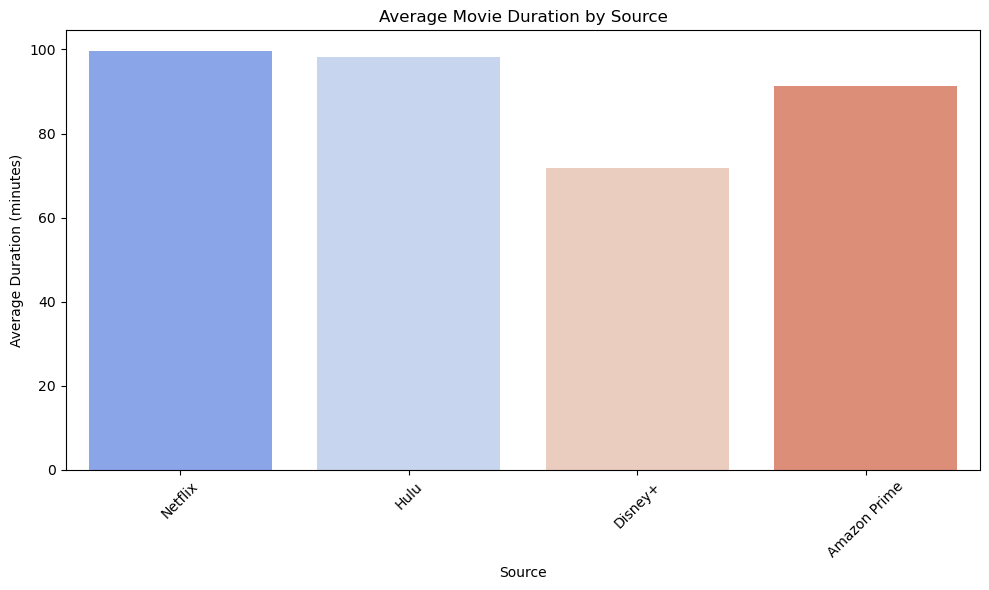

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is the DataFrame from previous steps
# Let's drop NA values for movie durations to ensure the plot works
movie_durations = combined_df.dropna(subset=["movie_duration_minutes"])

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the average movie duration by source using a bar plot
sns.barplot(
    x="source",
    y="movie_duration_minutes",
    hue="source",
    data=movie_durations,
    errorbar=None,
    palette="coolwarm",
    ax=ax,
)

ax.set_title("Average Movie Duration by Source")
ax.set_ylabel("Average Duration (minutes)")
ax.set_xlabel("Source")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

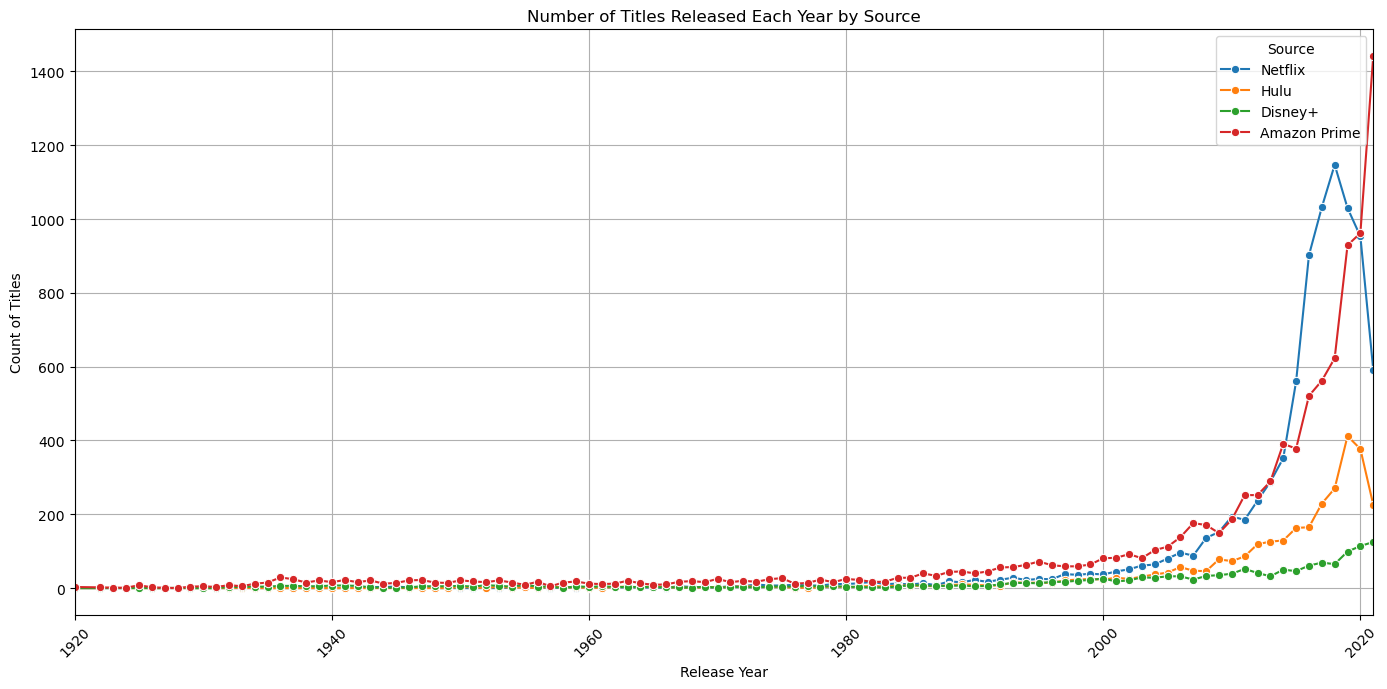

In [14]:
# Group by release year and source and count titles
yearly_releases = (
    combined_df.groupby(["release_year", "source"]).size().reset_index(name="count")
)

# Pivot the data for plotting
yearly_releases_pivot = yearly_releases.pivot(
    index="release_year", columns="source", values="count"
).fillna(0)

# Reset index to get 'release_year' back as a column
yearly_releases_pivot = yearly_releases_pivot.reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Using seaborn lineplot
sns.lineplot(
    data=yearly_releases_pivot,
    x="release_year",
    y="Netflix",
    label="Netflix",
    marker="o",
)
sns.lineplot(
    data=yearly_releases_pivot, x="release_year", y="Hulu", label="Hulu", marker="o"
)
sns.lineplot(
    data=yearly_releases_pivot,
    x="release_year",
    y="Disney+",
    label="Disney+",
    marker="o",
)
sns.lineplot(
    data=yearly_releases_pivot,
    x="release_year",
    y="Amazon Prime",
    label="Amazon Prime",
    marker="o",
)

# Customization
plt.title("Number of Titles Released Each Year by Source")
plt.ylabel("Count of Titles")
plt.xlabel("Release Year")
plt.legend(title="Source")
plt.grid(True)
plt.xlim(
    yearly_releases_pivot["release_year"].min(),
    yearly_releases_pivot["release_year"].max(),
)  # Limit x-axis to range of years
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout

# Show the plot
plt.show()

## Python for Data Science

---

- pandas
- Matplotlib
- Seaborn
- scikit-learn
    - Machine learning! Mostly classical machine learning algorithms.
    - Regression, classification, clustering, dimensionality reduction, model selection, preprocessing.
    - For deep learning applications, we can look to other libraries like PyTorch and Tensorflow!


## A simple scikit-learn example

In [15]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

# Display the first few records
display(HTML(tips.head(3).to_html()))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


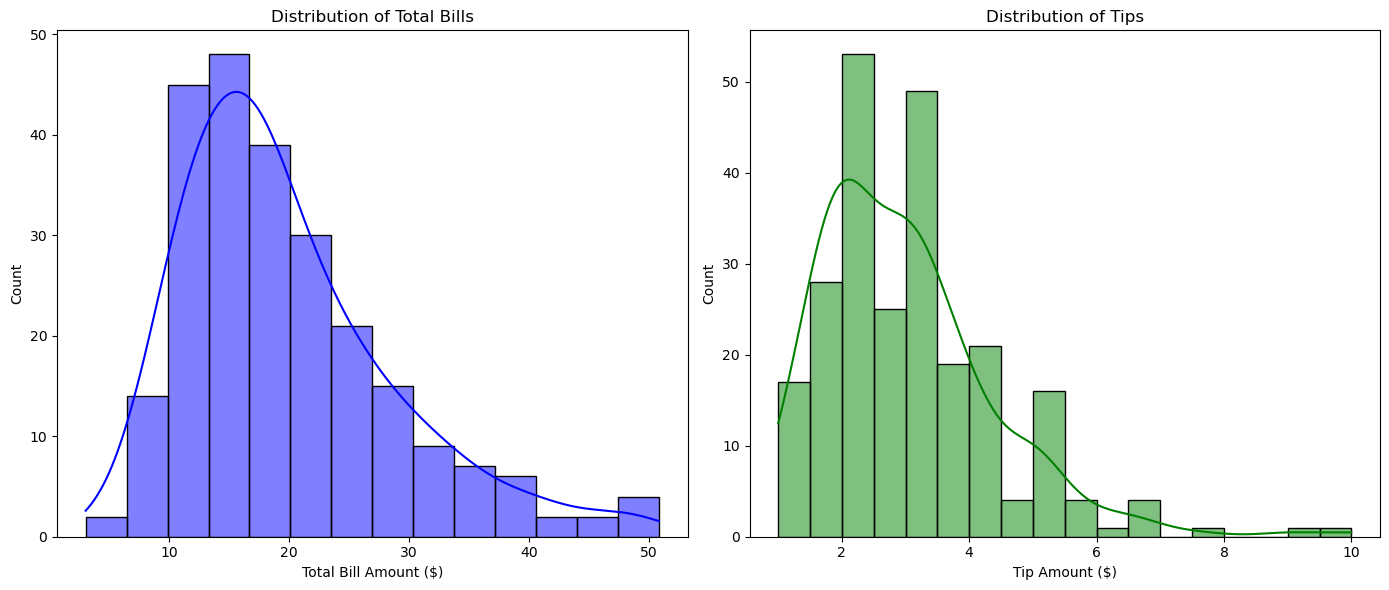

In [16]:
# Distribution plot of total bills and tips
plt.figure(figsize=(14, 6))

# Plot the distribution of total bills
plt.subplot(1, 2, 1)
sns.histplot(tips["total_bill"], kde=True, color="blue")
plt.title("Distribution of Total Bills")
plt.xlabel("Total Bill Amount ($)")

# Plot the distribution of tips
plt.subplot(1, 2, 2)
sns.histplot(tips["tip"], kde=True, color="green")
plt.title("Distribution of Tips")
plt.xlabel("Tip Amount ($)")

plt.tight_layout()
plt.show()

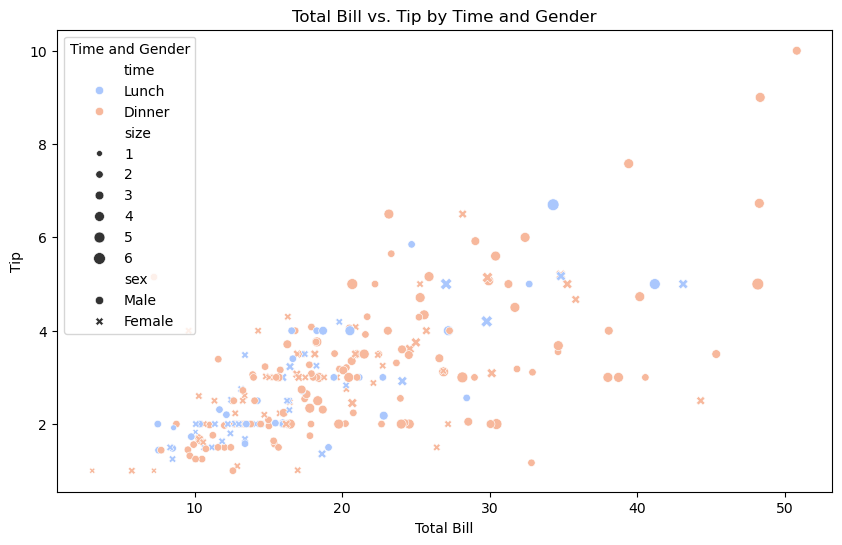

In [17]:
# Scatter plot to visualize the relationship between total bill and tip
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="total_bill",
    y="tip",
    data=tips,
    hue="time",
    style="sex",
    size="size",
    palette="coolwarm",
)
plt.title("Total Bill vs. Tip by Time and Gender")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Time and Gender")
plt.show()

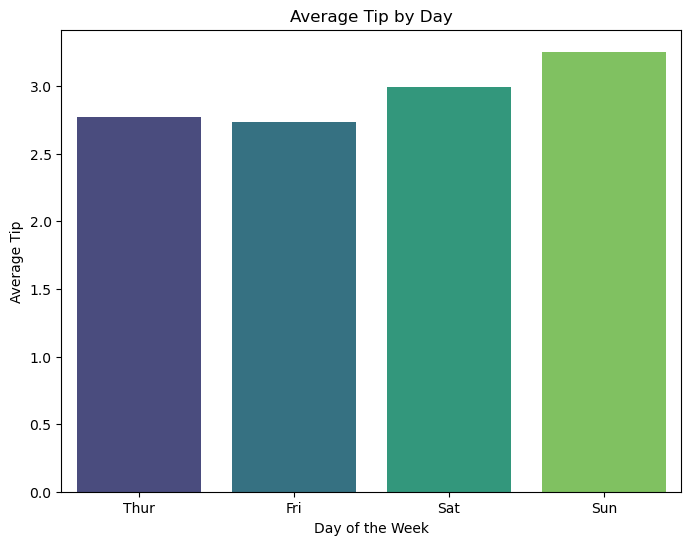

In [18]:
# Bar plot of average tips by day
import numpy as np

plt.figure(figsize=(8, 6))
sns.barplot(
    x="day",
    y="tip",
    data=tips,
    errorbar=None,
    hue="day",
    palette="viridis",
    estimator=np.mean,
)
plt.title("Average Tip by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Average Tip")
plt.show()

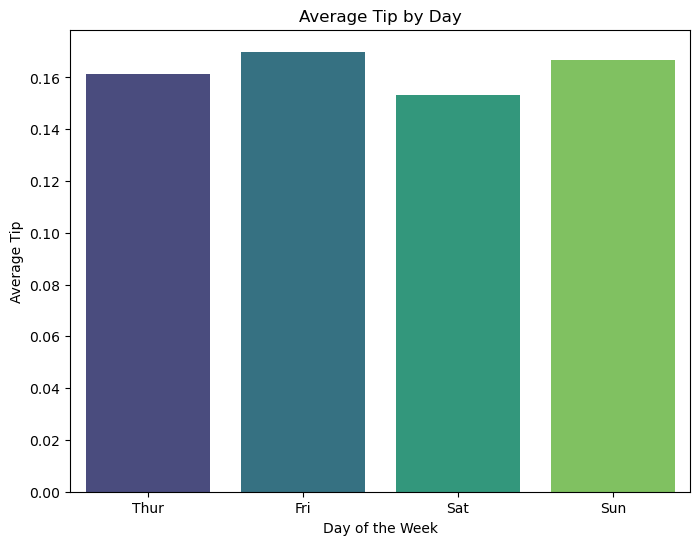

In [19]:
# Bar plot of average tips by day
import numpy as np

plt.figure(figsize=(8, 6))
tips["bill_tip_ratio"] = tips["tip"] / tips["total_bill"]
sns.barplot(
    x="day",
    y="bill_tip_ratio",
    data=tips,
    errorbar=None,
    hue="day",
    palette="viridis",
    estimator=np.mean,
)
plt.title("Average Tip by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Average Tip")
plt.show()

1. **Import the Required Libraries**
   - Import scikit-learn's modeling and evaluation modules (e.g., `LinearRegression` and `train_test_split`).

2. **Load and Prepare the Dataset**
   - Load the dataset (e.g., tips dataset).
   - Clean and preprocess data if necessary (e.g., handle missing values, encode categorical variables).
   - Select features and target variable (e.g., `total_bill` as feature and `tip` as target).

3. **Split the Data into Training and Testing Sets**
   - Use `train_test_split` to divide the data (e.g., 80% training, 20% testing).


## Scikit-learn Workflow

4. **Create a Model Instance**
   - Create an instance of the model (e.g., `model = LinearRegression()`).

5. **Train the Model**
   - Fit the model to the training data (e.g., `model.fit(X_train, y_train)`).

6. **Make Predictions**
   - Use the trained model to make predictions on the test data (e.g., `y_pred = model.predict(X_test)`).

In [ ]:
7. **Evaluate the Model**
   - Evaluate model performance using metrics like Mean Squared Error (MSE) and R-squared (e.g., `mean_squared_error(y_test, y_pred)`).

8. **Visualization**
   - Visualize the results to communicate findings (e.g., use `sns.regplot` to show the regression line).

9. **Interpret Results**
   - Interpret the model's coefficients and performance metrics to understand the relationship between features and the target.

#### Example: Predicting Tips from Total Bill

- **Model**: Linear Regression
- **Feature**: Total Bill (`total_bill`)
- **Target**: Tip (`tip`)
- **Mean Squared Error**: `mse`
- **R-squared**: `r2`
- **Insight**: The model's R-squared value indicates that percent of the variability in tips can be explained by the total bill amount.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For the linear regression model, we'll only use 'total_bill' to predict 'tip'
X = tips[["total_bill"]]  # Features (independent variable)
y = tips["tip"]  # Target (dependent variable)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# Create the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.57
R-squared: 0.54


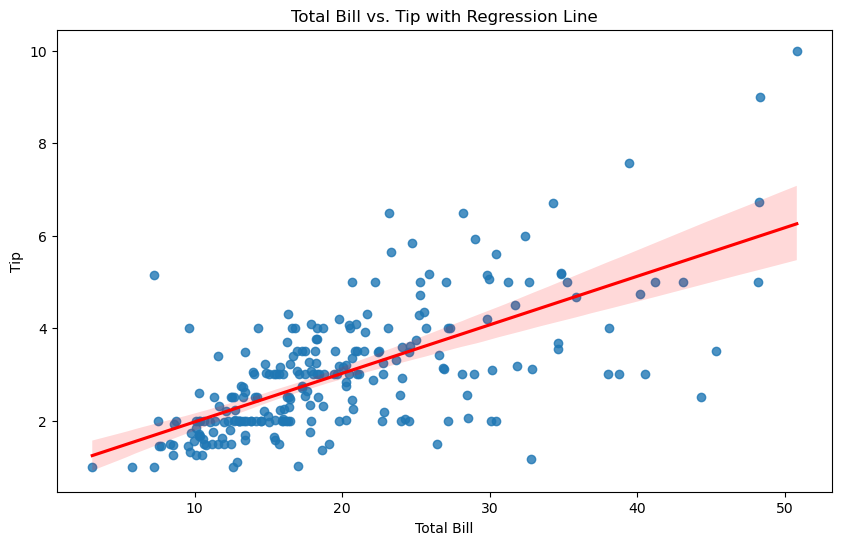

In [22]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="total_bill", y="tip", data=tips, line_kws={"color": "red"})
plt.title("Total Bill vs. Tip with Regression Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()